<br><br><center><h1 style="font-size:2em;color:#2467C0">Análisis del índice de la Paz en México</h1></center>

## Importación de librerías utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Conjunto de datos

In [2]:
df = pd.read_csv('datos/IPM_2022.csv')
df.head()

,ESTADO,ID,HOMICIDIO,DELITOS_CON_VIOLENCIA,DELITOS_CON_ARMAS_DE_FUEGO,DELINCUENCIA_ORGANIZADA,CÁRCEL_SIN_SENTENCIA
0,AGUASCALIENTES,AS,1.290,3.087,1.427,2.516,2.152
1,BAJA_CALIFORNIA,BC,4.523,3.743,4.336,3.879,3.471
2,BAJA_CALIFORNIA_SUR,BS,1.361,3.474,1.167,4.292,2.188
3,CAMPECHE,CC,1.487,3.039,1.834,2.035,1.609
4,CHIAPAS,CS,1.385,1.512,1.349,1.350,5.000


## Análisis exploratorio

In [3]:
#Se comprueban los tipos de datos
df.dtypes

ESTADO                         object
ID                             object
HOMICIDIO                     float64
DELITOS_CON_VIOLENCIA         float64
DELITOS_CON_ARMAS_DE_FUEGO    float64
DELINCUENCIA_ORGANIZADA       float64
CÁRCEL_SIN_SENTENCIA          float64
dtype: object

In [4]:
#Principales parámetros estadísticos
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HOMICIDIO,32.0,2.285281,1.134268,1.091,1.48125,1.7420,2.94575,5.0
DELITOS_CON_VIOLENCIA,32.0,2.992219,0.871311,1.068,2.67275,2.9185,3.47800,5.0
DELITOS_CON_ARMAS_DE_FUEGO,32.0,2.422625,1.188294,1.038,1.49900,1.8565,3.10325,5.0
DELINCUENCIA_ORGANIZADA,32.0,2.569500,1.076524,1.261,1.79575,2.1745,3.27000,5.0
CÁRCEL_SIN_SENTENCIA,32.0,2.727906,1.036658,1.609,1.97275,2.4090,3.00825,5.0


array([[<Axes: title={'center': 'HOMICIDIO'}>,
        <Axes: title={'center': 'DELITOS_CON_VIOLENCIA'}>],
       [<Axes: title={'center': 'DELITOS_CON_ARMAS_DE_FUEGO'}>,
        <Axes: title={'center': 'DELINCUENCIA_ORGANIZADA'}>],
       [<Axes: title={'center': 'CÁRCEL_SIN_SENTENCIA'}>, <Axes: >]],
      dtype=object)

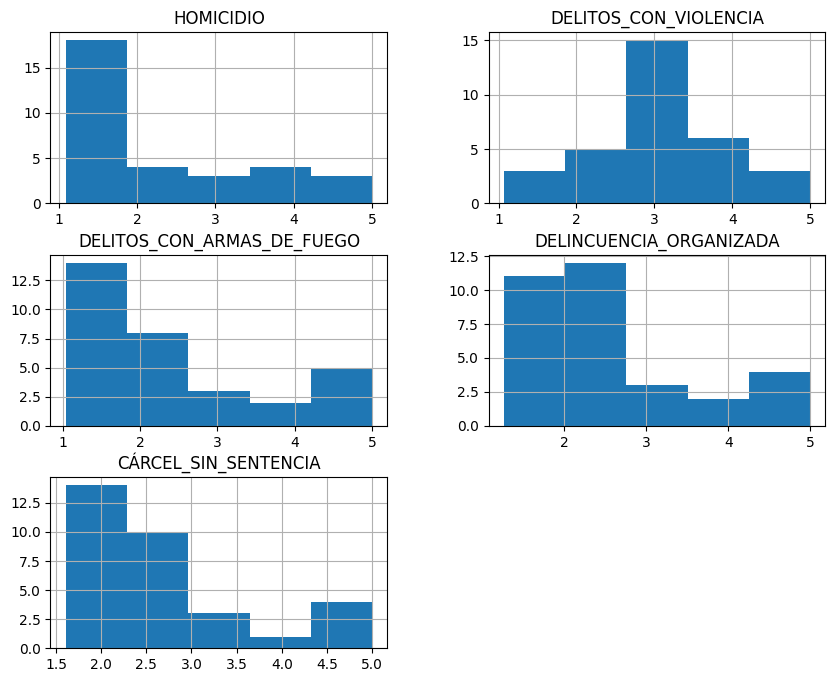

In [5]:
#Histograma de todas las variables
df.hist(bins = 5, figsize = (10,8))

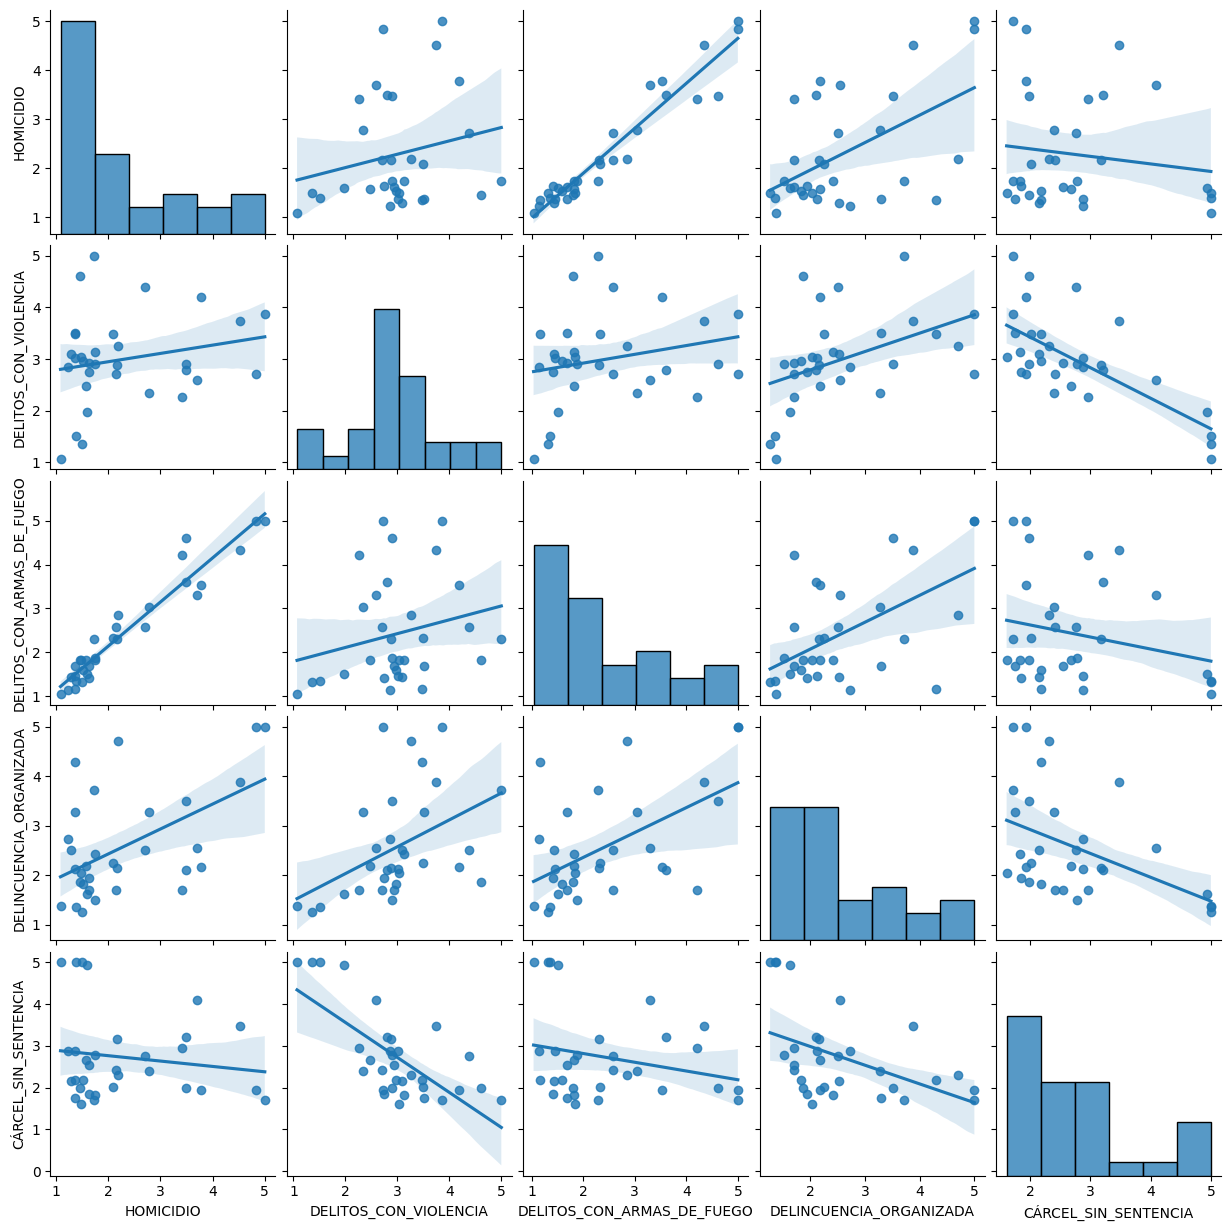

In [6]:
#Correlación lineal entre variables
sns.pairplot(df, kind = 'reg', height = 2.5, aspect = 1)

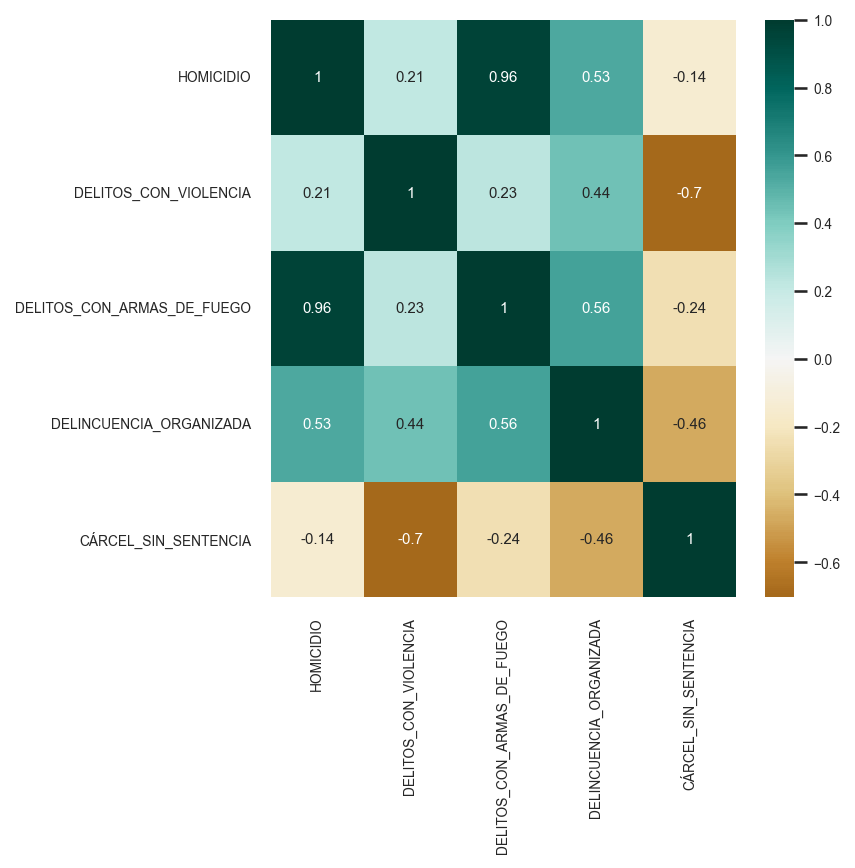

In [7]:
# Matriz correlación númerica y visual
df_atributos = df.drop(['ESTADO', 'ID'], axis = 1)

plt.figure(figsize=(5,5),  dpi = 150)
corrMatrix = df_atributos.corr().round(3)
sns.set( font_scale= 0.6)
sns.heatmap( corrMatrix, annot = True, cmap = 'BrBG', center=0 )
plt.xticks( rotation = 90 )
plt.show()

Se puede observar que los delitos con armas de fuego están fuertemente correlacionados con los homicidios

## Normalización de los datos

In [8]:
#Re-escalamiento de las variables
from sklearn import preprocessing
df_escalado = preprocessing.scale(df_atributos)

(array([ 8., 10.,  4.,  0.,  2.,  1.,  4.,  0.,  1.,  2.]),
 array([-1.06975715, -0.71961511, -0.36947308, -0.01933104,  0.330811  ,
         0.68095304,  1.03109507,  1.38123711,  1.73137915,  2.08152118,
         2.43166322]),
 <BarContainer object of 10 artists>)

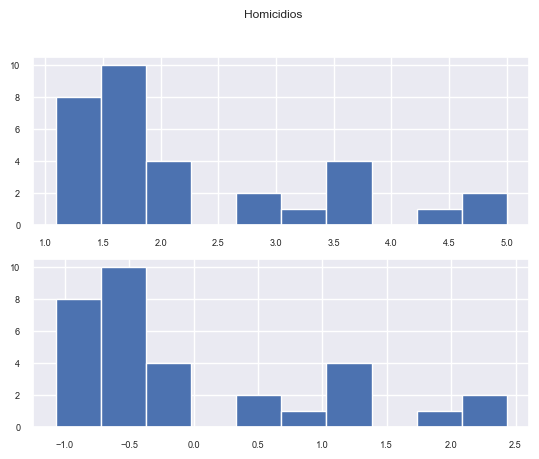

In [9]:
#Comparación antes y después del re-escalado
lista_homicidios = df_escalado[:,:1].flatten()
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Homicidios')
ax1.hist(df['HOMICIDIO'])
ax2.hist(lista_homicidios)

Se observa que la escala se cambia sin afectar la forma de los datos

In [10]:
df_escalado = pd.DataFrame(df_escalado)
df_escalado.head()

,0,1,2,3,4
0,-0.891506,0.110521,-0.851267,-0.050492,-0.564431
1,2.004399,0.875456,1.635951,1.235878,0.728287
2,-0.827909,0.561786,-1.073569,1.625659,-0.529148
3,-0.715047,0.054550,-0.503279,-0.504450,-1.096611
4,-0.806412,-1.726024,-0.917958,-1.150938,2.226819


## Separación de los datos en grupos

In [11]:
#Definir y ejecutar el algoritmo para 6 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42, n_init = 10)
kmeans.fit(df_escalado)
#Valor de WCSS
kmeans.inertia_

27.504500595319016

## Aplicación del método del codo

In [12]:
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init = 10)
    kmeans.fit(df_escalado)
    wcss.append(kmeans.inertia_)

wcss

[160.0,
 101.58877165335477,
 61.28895254156493,
 48.68442013282121,
 34.79962490081403,
 27.504500595319016,
 25.27403168053224,
 21.645649378336564,
 18.7210347113091,
 15.47024031720755,
 13.681611634625318]

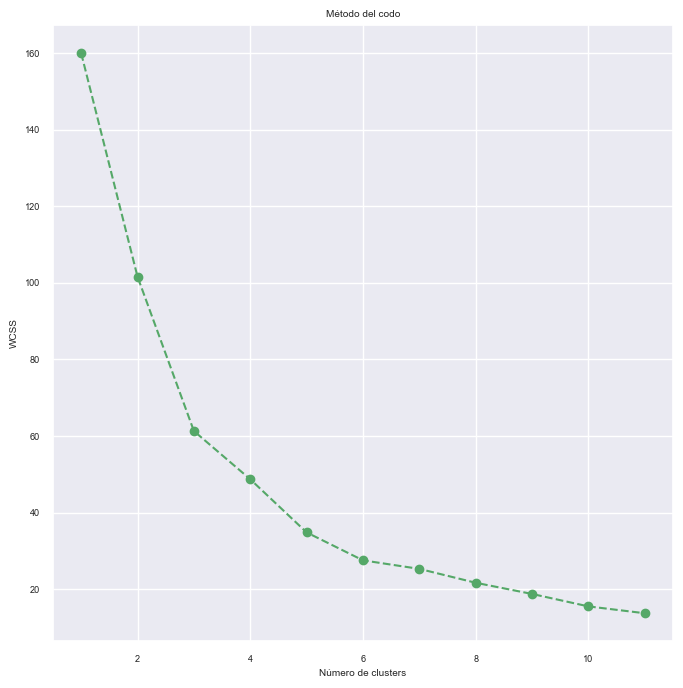

In [13]:
#Graficación de los valores de WCSS
plt.figure(figsize = (8, 8))
plt.plot(range(1,12), wcss, "go--")
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Se determina que a partir del número 4 la atenuación deja de ser significativa, de manera que se toma un total de 4 clusters

## Análisis de resultados

In [14]:
#Predicción de las etiquetas
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42, n_init = 10)
Y_kmeans = kmeans.fit_predict(df_escalado)
Y_kmeans

array([1, 0, 1, 1, 2, 3, 1, 0, 1, 1, 0, 3, 1, 1, 1, 3, 3, 2, 3, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 2, 1, 2, 0])

In [15]:
#Se agrega el valor del cluster al dataframe original
df['cluster'] = Y_kmeans + 1
df.head()

,ESTADO,ID,HOMICIDIO,DELITOS_CON_VIOLENCIA,DELITOS_CON_ARMAS_DE_FUEGO,DELINCUENCIA_ORGANIZADA,CÁRCEL_SIN_SENTENCIA,cluster
0,AGUASCALIENTES,AS,1.290,3.087,1.427,2.516,2.152,2
1,BAJA_CALIFORNIA,BC,4.523,3.743,4.336,3.879,3.471,1
2,BAJA_CALIFORNIA_SUR,BS,1.361,3.474,1.167,4.292,2.188,2
3,CAMPECHE,CC,1.487,3.039,1.834,2.035,1.609,2
4,CHIAPAS,CS,1.385,1.512,1.349,1.350,5.000,3


<Figure size 500x500 with 0 Axes>

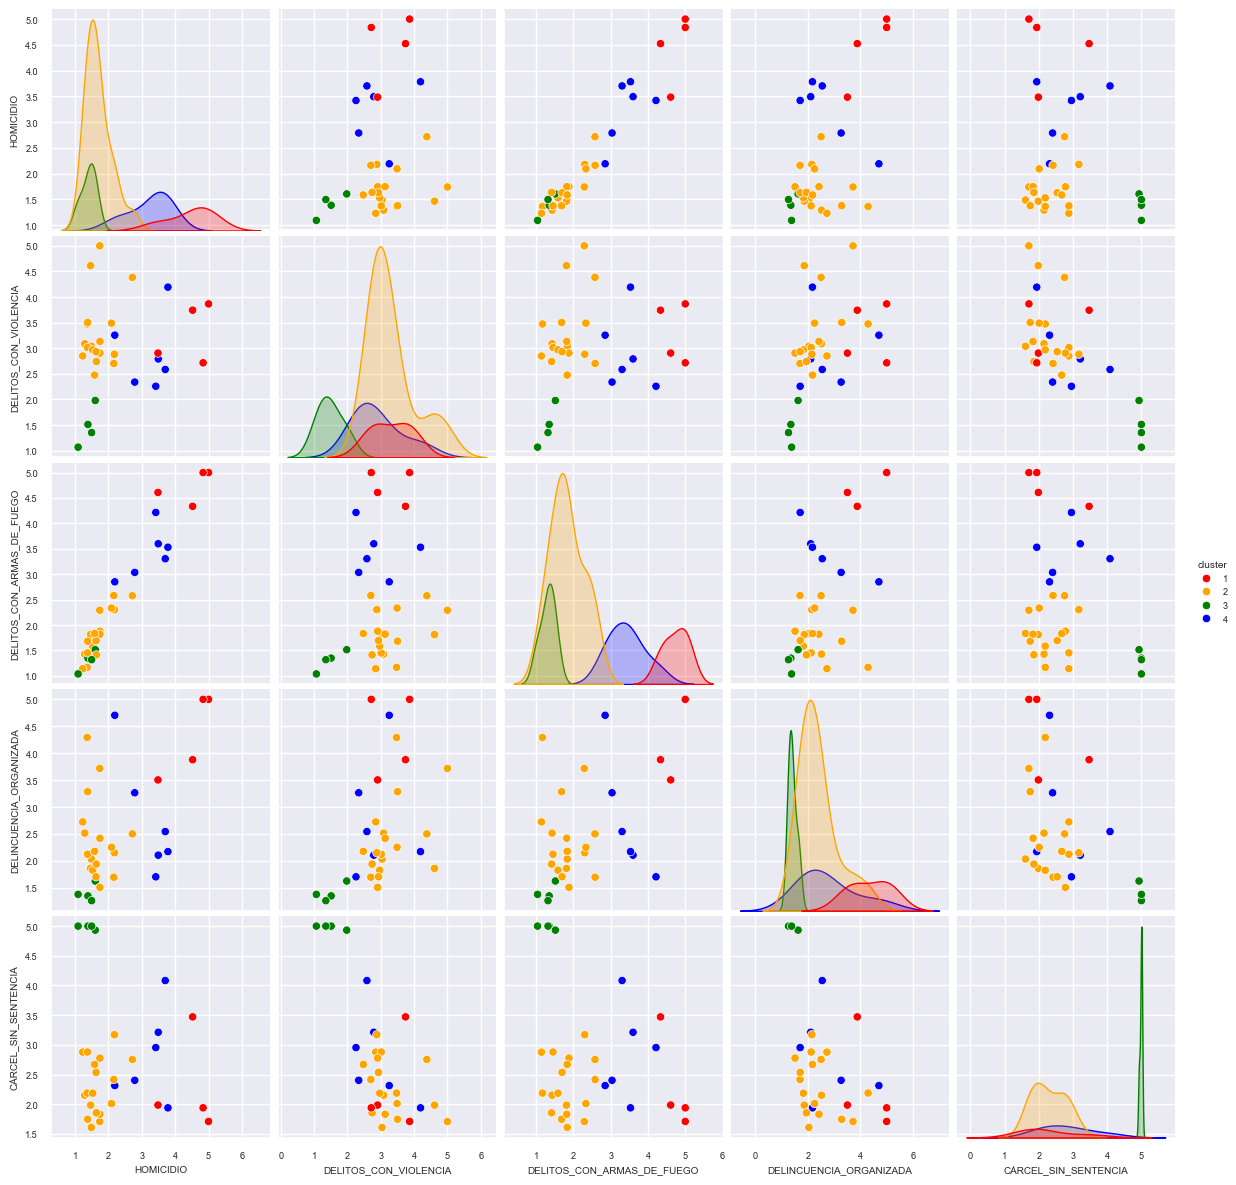

In [16]:
#Comparación de todas los pares de variables
fig = plt.figure(figsize = (5,5))
sns.pairplot(df, hue = 'cluster', palette = ['red', 'orange', 'green', 'blue'], height = 2.4, aspect = 1)
plt.show()

Se puede observar que los estados pertenecientas al cluster número 1 son los que suelen tener las cifras más altas. Recordemos que en los indicadores del IPM toman valores del 1 al 5 donde 1 indica un mayor nivel de paz y 5 uno menor, de manera que los estados del cluster 1 son los que presentan mayor cantidad de homicidios, delitos con armas de fuego y delincuencia organizada, pero se encuentran alrededor de la media en el indicador cárcel sin sentencia. Por su parte, los estados en el cluster 4 son los que presentan un menor índice de paz en la mayoría de los indicadores. No obstante, resulta interesante notar que también son los estados con mayor índice en el parámetro cárcel sin sentencia, el cual se relaciona con el número de personas en prisión sin sentencia.

Los 3 parámetros más importantes para el IPM son los homicidios, los delitos con violencia y la delincuencia organizada. A continuación se compararán estos tres delitos

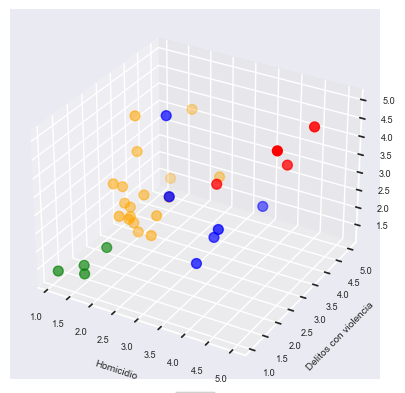

In [17]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors

fig = plt.figure()
ax = plt.axes(projection = '3d')
#ax = Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')

x = df['HOMICIDIO']
y = df['DELITOS_CON_VIOLENCIA']
z = df['DELINCUENCIA_ORGANIZADA']
colors = df['cluster']
cmap = matplotlib.colors.ListedColormap(['red', 'orange', 'green', 'blue'])
g = ax.scatter(x, y, z, s = 50, c = colors, cmap = cmap)

ax.set_xlabel('Homicidio')
ax.set_ylabel('Delitos con violencia')
ax.set_zlabel('Delincuencia organizada')

legend = ax.legend(*g.legend_elements(), loc = 'lower center', title = 'Cluster', borderaxespad = -10) 
ax.add_artist(legend)


## Visualización de los clusters en un mapa

In [18]:
df_dic = df.set_index('ID')['cluster']
df_dic.head()

ID
AS    2
BC    1
BS    2
CC    2
CS    3
Name: cluster, dtype: int32

In [19]:
mapa = folium.Map(location=[24, -102],zoom_start=5, min_zoom = 4, max_zoom = 6)
estados_geo = 'datos/estados_mx_geo.json'

In [20]:
def my_color(feature):
    if df_dic[feature['id']] == 1:
        return 'red'
    elif df_dic[feature['id']] == 2:
        return 'orange'
    elif df_dic[feature['id']] == 3:
        return 'green'
    elif df_dic[feature['id']] == 4:
        return 'blue'

In [21]:
folium.GeoJson(
    estados_geo,
    style_function = lambda feature: {
        'fillColor': my_color(feature),
        'color': 'black',
        'fill_opacity': 10.01,
        'weight': 0.1
    }
).add_to(mapa)
mapa

## Comparación con el método de la silueta

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(df_escalado, kmeans.labels_)

0.4029185729591892

In [23]:
# Cada elemento de la lista generada es un modelo Kmeans con un número específico de clústeres.
kmeans_sil= [KMeans(n_clusters= i, random_state= 42, init='k-means++', n_init = 10).fit(df_escalado) for i in range(1,11)]

# Cálculo del silhouette score a cada modelo (de diferente número de clústeres).
sil_scores = [silhouette_score(df_escalado, model.labels_, random_state=11) for model in kmeans_sil[1:]]

# Guardando los valores en un array:
sil_scores = np.array(sil_scores)
sil_scores

array([0.33567306, 0.43768804, 0.40291857, 0.39588698, 0.41558289,
       0.39170033, 0.40115437, 0.38767052, 0.29178236])

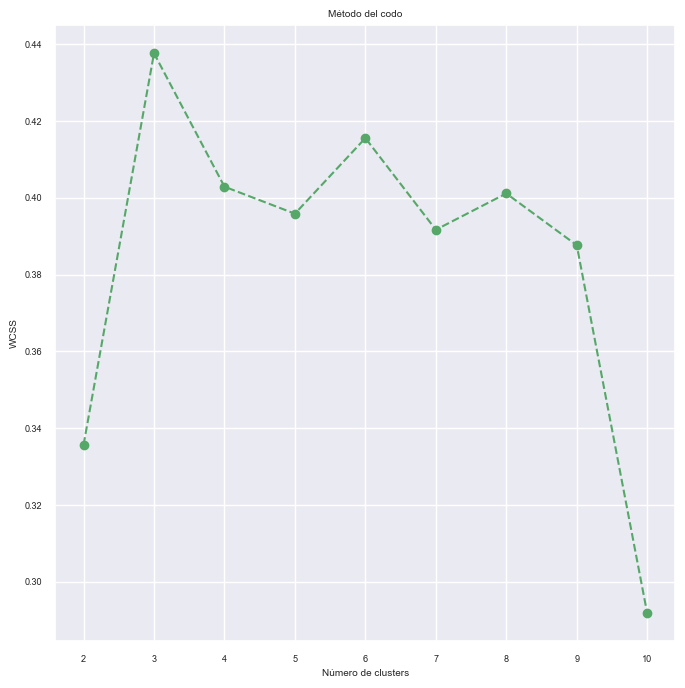

In [24]:
#Graficación de los valores de WCSS
plt.figure(figsize = (8, 8))
plt.plot(range(2,11), sil_scores, "go--")
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

El método de la silueta sugiere utilizar 3 clusters. Realizando nuevamente el análisis se obtiene

In [25]:
#Predicción de las etiquetas
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42, n_init = 10)
Y_kmeans = kmeans.fit_predict(df_escalado)
Y_kmeans

array([1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 2, 1, 2, 0])

In [26]:
#Agregar el valor del cluster al dataframe original
df['cluster'] = Y_kmeans + 1
df.head()

,ESTADO,ID,HOMICIDIO,DELITOS_CON_VIOLENCIA,DELITOS_CON_ARMAS_DE_FUEGO,DELINCUENCIA_ORGANIZADA,CÁRCEL_SIN_SENTENCIA,cluster
0,AGUASCALIENTES,AS,1.290,3.087,1.427,2.516,2.152,2
1,BAJA_CALIFORNIA,BC,4.523,3.743,4.336,3.879,3.471,1
2,BAJA_CALIFORNIA_SUR,BS,1.361,3.474,1.167,4.292,2.188,2
3,CAMPECHE,CC,1.487,3.039,1.834,2.035,1.609,2
4,CHIAPAS,CS,1.385,1.512,1.349,1.350,5.000,3


<Figure size 500x500 with 0 Axes>

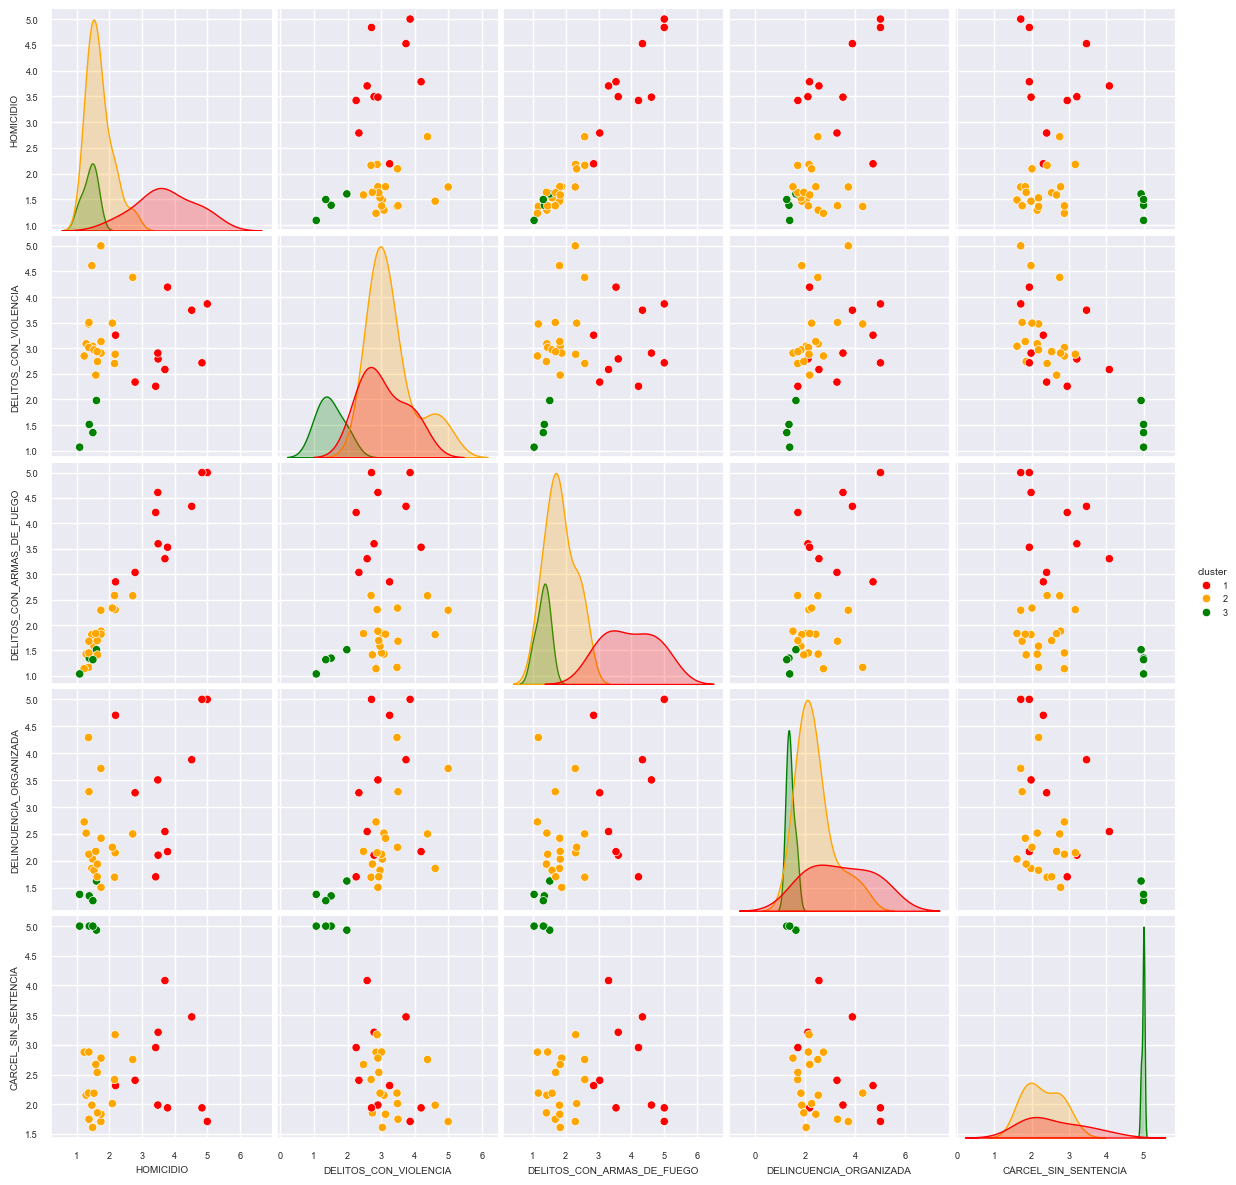

In [27]:
#Comparación de todas los pares de variables
fig = plt.figure(figsize = (5,5))
sns.pairplot(df, hue = 'cluster', palette = ['red', 'orange', 'green'], height = 2.4, aspect = 1)
plt.show()

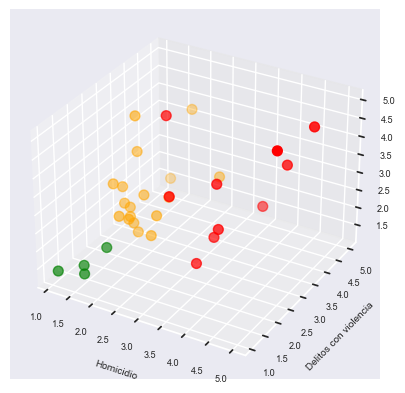

In [28]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors

fig = plt.figure()
ax = plt.axes(projection = '3d')
#ax = Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')

x = df['HOMICIDIO']
y = df['DELITOS_CON_VIOLENCIA']
z = df['DELINCUENCIA_ORGANIZADA']
colors = df['cluster']
cmap = matplotlib.colors.ListedColormap(['red', 'orange', 'green'])
g = ax.scatter(x, y, z, s = 50, c = colors, cmap = cmap)

ax.set_xlabel('Homicidio')
ax.set_ylabel('Delitos con violencia')
ax.set_zlabel('Delincuencia organizada')

legend = ax.legend(*g.legend_elements(), loc = 'lower center', title = 'Cluster', borderaxespad = -10) 
ax.add_artist(legend)

In [29]:
df_dic = df.set_index('ID')['cluster']
df_dic.head()

ID
AS    2
BC    1
BS    2
CC    2
CS    3
Name: cluster, dtype: int32

In [30]:
mapa2 = folium.Map(location=[24, -102],zoom_start=5, min_zoom = 4, max_zoom = 6)

In [31]:
folium.GeoJson(
    estados_geo,
    style_function = lambda feature: {
        'fillColor': my_color(feature),
        'color': 'black',
        'fill_opacity': 10.01,
        'weight': 0.1
    }
).add_to(mapa2)
mapa2